In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns

In [2]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 150)

In [3]:
root = 'D:\\Database\\ashrae-energy-prediction-dataset\\'

In [4]:
building_meta_df_office=pd.read_csv(root+'office_building_meta0518.csv')

In [5]:
building_meta_df_office.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,EUI,chilled_water,steam,hotwater,EUIR,HDD18,CDD18,EUIC,EPIn_s,EPIn_w,EPIw_s,EPIw_w,EPIt_s,EPIt_a,NWH_sm_lv,NWH_wt_lv,WKD_sm_lv,WKD_wt_lv,TRS_sp_lv,TRS_at_lv
0,0,9,Office,27000,2010,0,40.9,1,0,0,79.57,326,2095,3,0.70,0.43,0.75,0.40,1.02,1.15,60.41,7.35,46.73,5.10,57.55,85.71
1,0,15,Office,83957,1974,0,26.5,1,0,0,73.84,326,2095,2,0.66,0.65,0.80,0.81,1.08,1.07,51.43,46.33,61.63,63.88,72.04,69.39
2,0,17,Office,15250,1980,0,67.4,0,0,0,86.74,326,2095,3,0.61,0.78,0.78,1.05,1.32,1.26,38.78,77.14,55.71,99.59,93.47,94.29
3,0,19,Office,18717,2004,0,81.2,0,0,0,88.53,326,2095,3,0.76,0.80,0.81,0.92,0.75,0.87,75.31,81.63,64.90,87.55,18.78,31.43
4,0,21,Office,7043,1990,0,82.2,0,0,0,88.89,326,2095,3,0.78,0.67,0.89,0.81,0.69,1.02,78.98,50.61,86.73,63.88,13.27,56.33
5,0,25,Office,103286,1969,0,27.8,0,0,0,75.27,326,2095,3,0.58,0.63,0.51,0.53,0.81,0.86,33.88,41.84,12.24,13.27,24.49,30.20
6,0,26,Office,26953,2005,0,49.1,0,0,0,82.08,326,2095,3,0.43,0.45,0.80,0.96,1.05,1.10,11.02,10.41,61.63,92.45,64.69,76.12
7,0,28,Office,52957,2016,0,34.7,1,0,0,78.14,326,2095,3,0.84,0.78,0.88,0.87,0.84,0.90,88.57,77.14,84.90,76.73,29.39,35.71
8,0,32,Office,48392,2005,0,58.7,0,0,0,84.59,326,2095,3,0.51,0.44,0.65,0.69,1.09,1.27,24.29,9.18,30.82,35.92,73.88,94.90
9,0,38,Office,12769,2013,0,348.3,0,0,0,91.04,326,2095,3,0.95,0.94,0.96,1.01,1.15,1.27,99.39,97.55,95.51,98.37,82.24,94.90


In [6]:
building_meta_df_office['Area']=building_meta_df_office['square_feet']*0.09290304

In [7]:
metadata=building_meta_df_office[building_meta_df_office['year_built']>1800]

In [25]:
building_meta_df_office=building_meta_df_office[building_meta_df_office['EPIt_s']<2][building_meta_df_office['EPIt_a']<2][building_meta_df_office['EPIw_w']<2][building_meta_df_office['EPIw_s']<2][building_meta_df_office['EPIn_s']<2][building_meta_df_office['EPIn_w']<2]

In [10]:
metadata_area=building_meta_df_office[building_meta_df_office['EUI']<180]

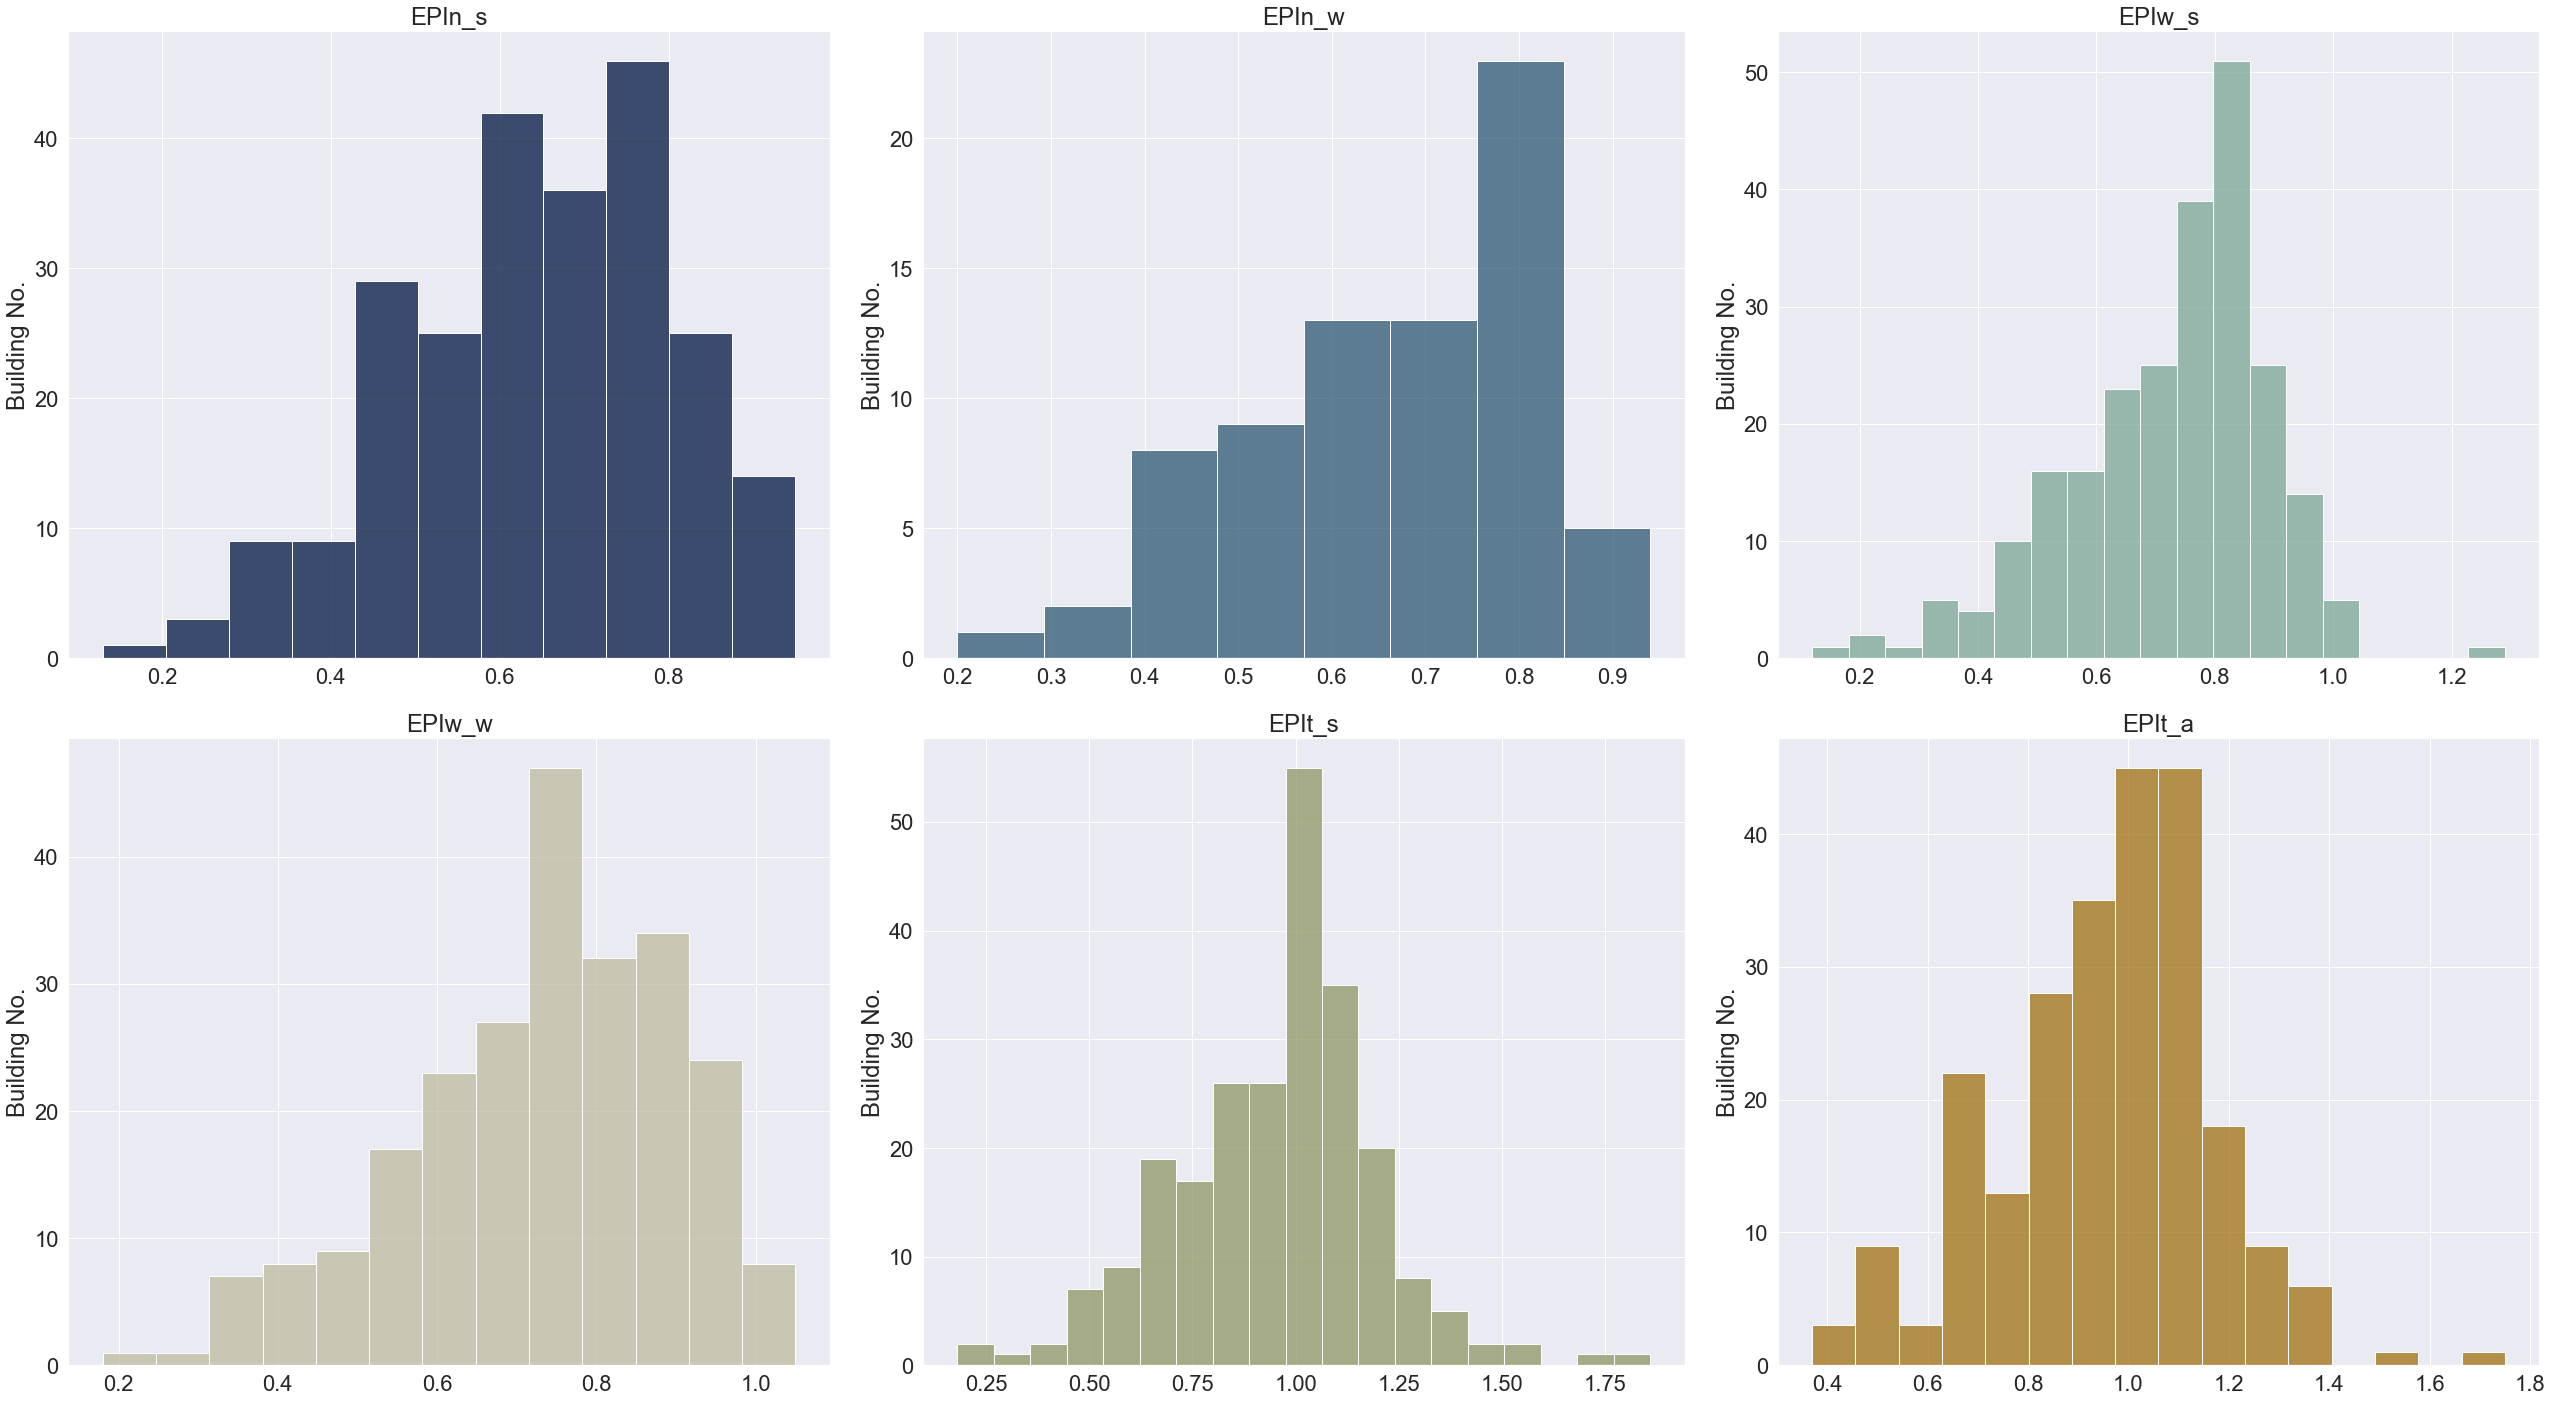

In [12]:
sns.set(rc={'figure.figsize':(36,20)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 3)

axes = axes.flatten()

color = "yellowgreen"

# primary use category countplot in decreasing order
# Temporary dataset
top5 = list(metadata['Area'].value_counts().iloc[:5].index)
#temp = metadata[["Area"]].copy()
#temp.loc[temp.primaryspaceusage.isin(top5) == False, "Area"] = "Other"
# Plot
ax1 = axes[0]
g1 = sns.histplot(data=building_meta_df_office, x="EPIn_s", color= '#001640', ax=ax1)
ax1.title.set_text('EPIn_s')
ax1.set(ylabel="Building No.", xlabel="")

ax2 = axes[1]
g2 = sns.histplot(data=metadata, x="EPIn_w", color= '#2D5873', ax=ax2)
ax2.title.set_text('EPIn_w')
ax2.set(ylabel="Building No.", xlabel="")

ax3 = axes[2]
g3 = sns.histplot(data=metadata_area, x="EPIw_s", color= '#7BA696', ax=ax3)
ax3.title.set_text('EPIw_s')
ax3.set(ylabel="Building No.", xlabel="")

ax4 = axes[3]
g4 = sns.histplot(data=metadata_area, x="EPIw_w", color= '#BFBA9F', ax=ax4)
ax4.title.set_text('EPIw_w')
ax4.set(ylabel="Building No.", xlabel="")

ax5 = axes[4]
g5 = sns.histplot(data=metadata_area, x="EPIt_s", color= '#8F9663', ax=ax5)
ax5.title.set_text('EPIt_s')
ax5.set(ylabel="Building No.", xlabel="")

ax6 = axes[5]
g6 = sns.histplot(data=metadata_area, x="EPIt_a", color= '#A1700F', ax=ax6)
ax6.title.set_text('EPIt_a')
ax6.set(ylabel="Building No.", xlabel="")

plt.tight_layout()
plt.savefig('EPIs_distribution_0520.jpg',dpi=300)

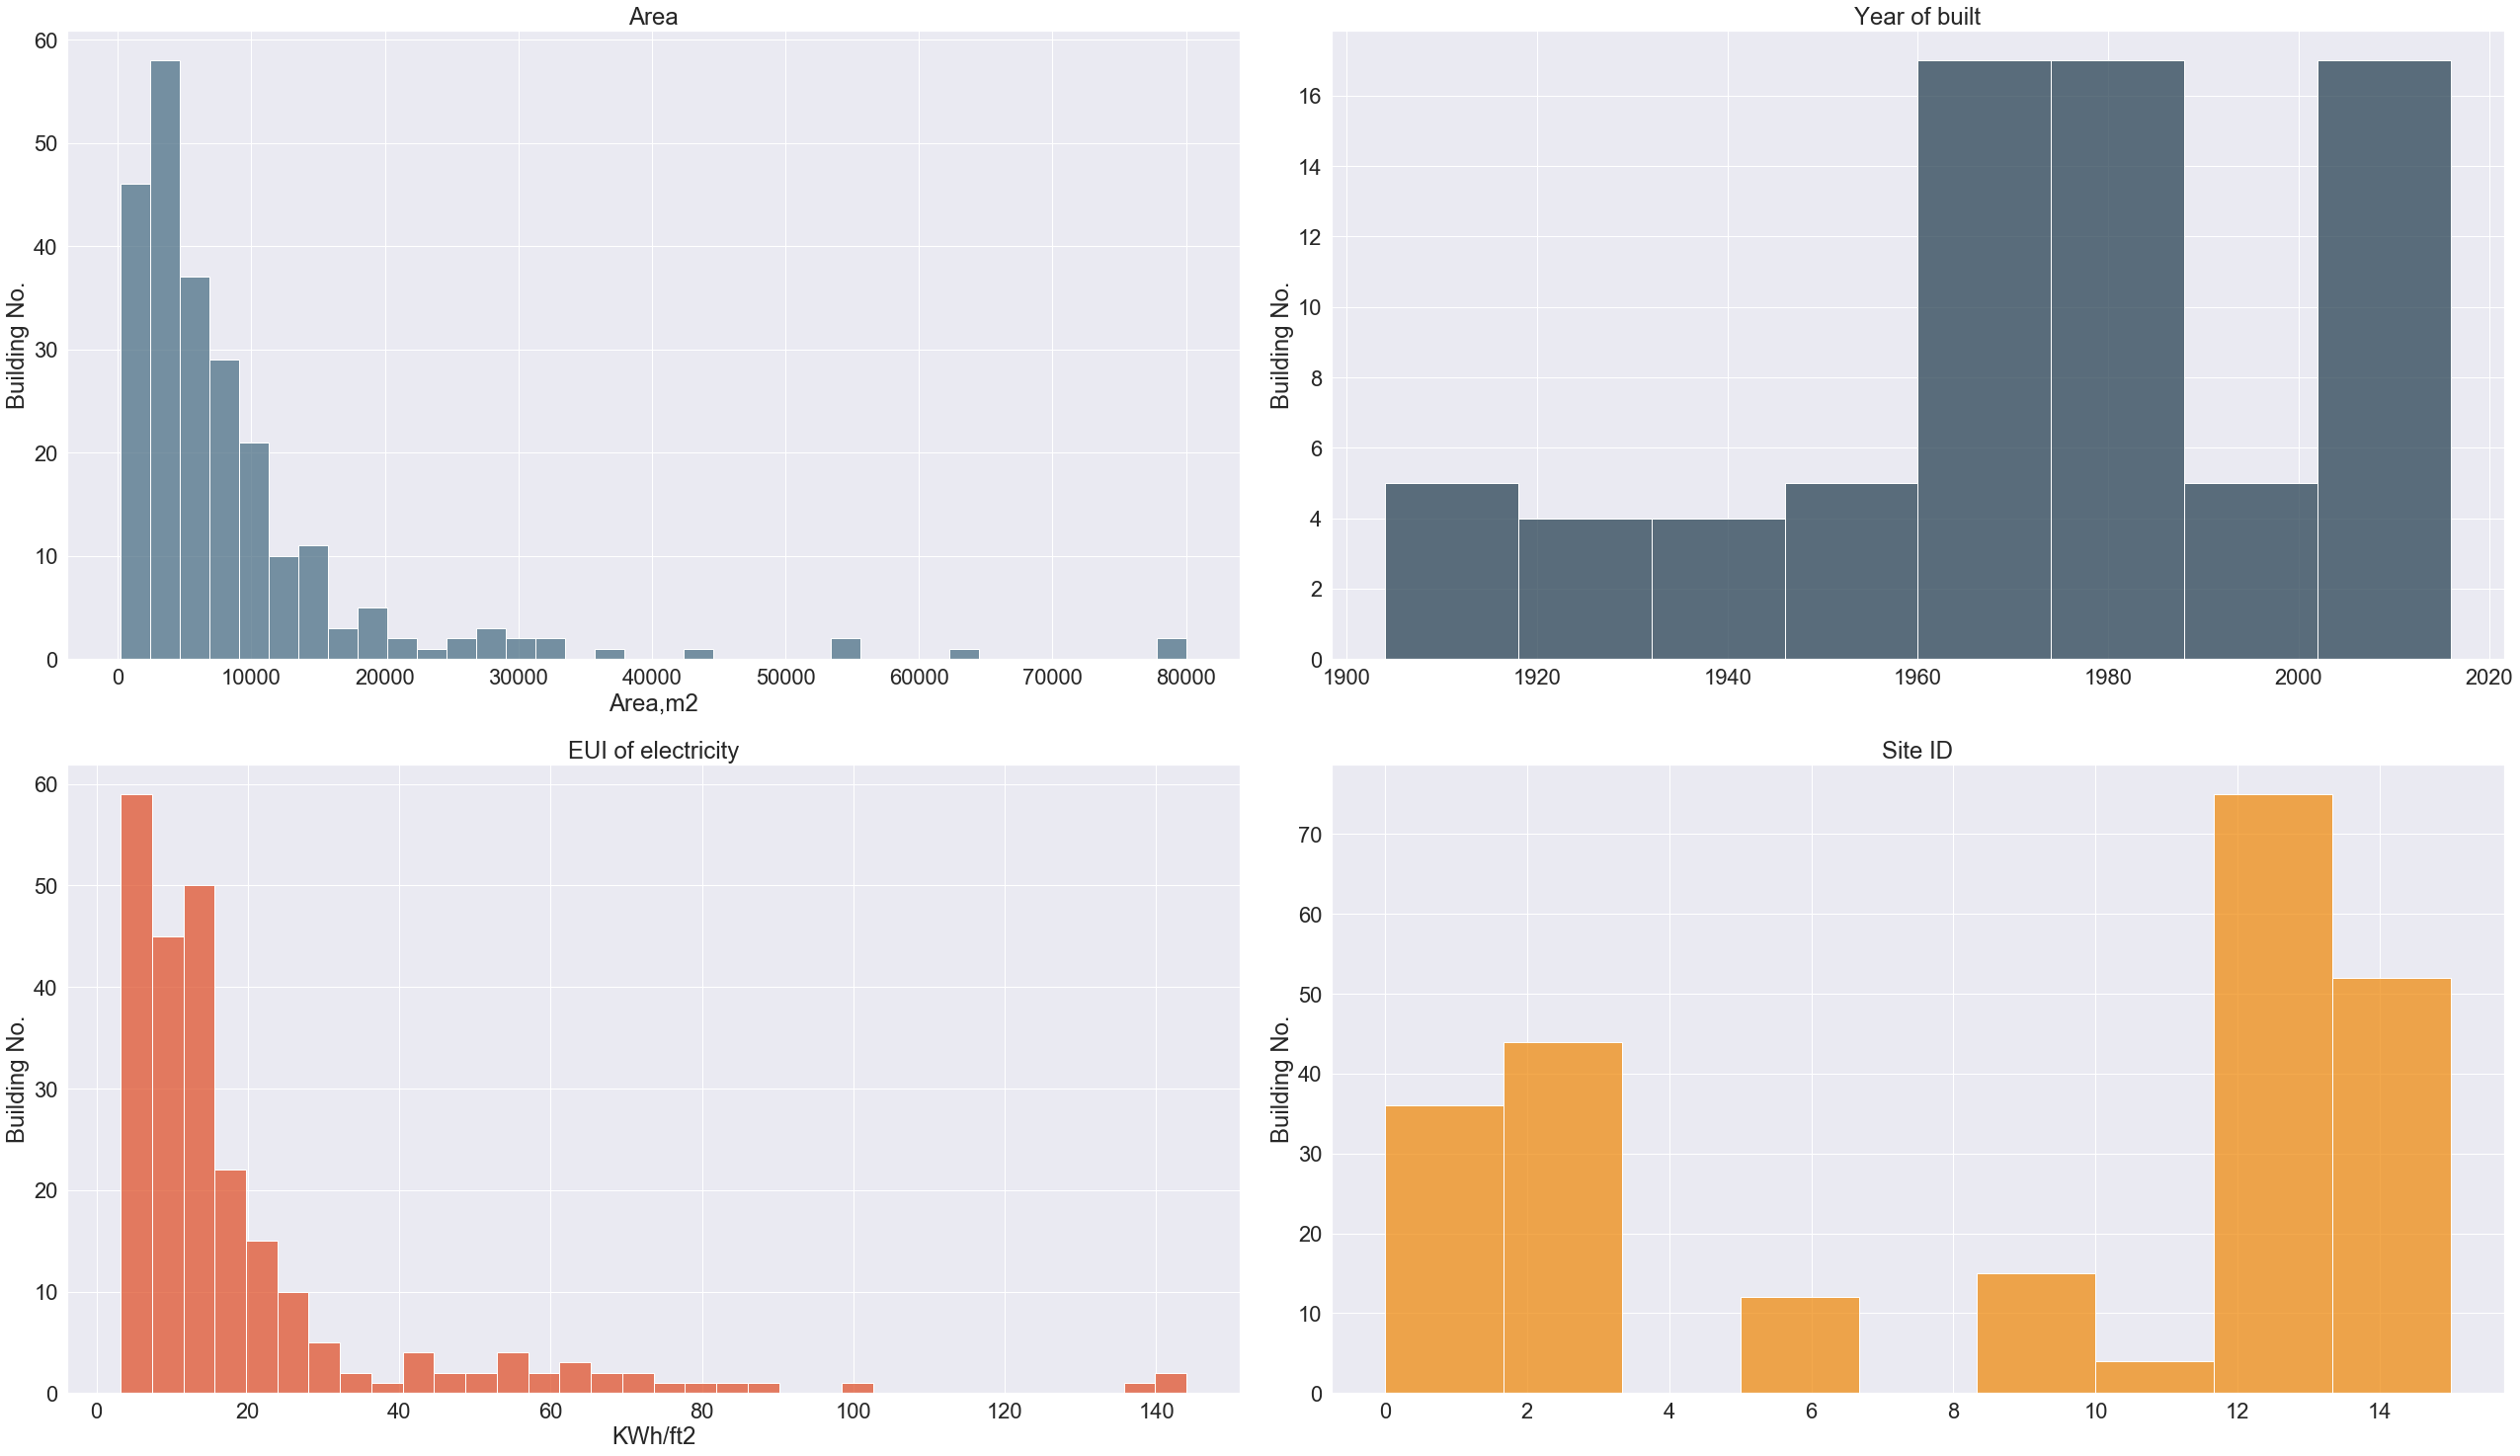

In [11]:
sns.set(rc={'figure.figsize':(36,21)})
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 2)

axes = axes.flatten()

color = "yellowgreen"

# primary use category countplot in decreasing order
# Temporary dataset
top5 = list(metadata['Area'].value_counts().iloc[:5].index)
#temp = metadata[["Area"]].copy()
#temp.loc[temp.primaryspaceusage.isin(top5) == False, "Area"] = "Other"
# Plot
ax1 = axes[0]
g1 = sns.histplot(data=building_meta_df_office, x="Area", color= '#4D7186', ax=ax1)
ax1.title.set_text('Area')
ax1.set(ylabel="Building No.", xlabel="Area,m2")

ax2 = axes[1]
g2 = sns.histplot(data=metadata, x="year_built", color= '#284253', ax=ax2)
ax2.title.set_text('Year of built')
ax2.set(ylabel="Building No.", xlabel="")

ax3 = axes[2]
g3 = sns.histplot(data=metadata_area, x="EUI", color= '#E0542E', ax=ax3)
ax3.title.set_text('EUI of electricity')
ax3.set(ylabel="Building No.", xlabel="KWh/ft2")

ax4 = axes[3]
g4 = sns.histplot(data=metadata_area, x="site_id", color= '#EF8C12', ax=ax4)
ax4.title.set_text('Site ID')
ax4.set(ylabel="Building No.", xlabel="")

plt.tight_layout()
plt.savefig('Feature_distribution_0520.jpg',dpi=300)

In [31]:
def round_x(x):
    area=10000
    if x is not np.nan:
        area=x*0.09290304
        return round(area,0)
    else:
        return 8481

In [33]:
print('The mean of EPIt_a',building_meta_df_office['EPIt_a'].mean(),'The mean of EPIt_s',building_meta_df_office['EPIt_s'].mean())

The mean of EPIt_a 0.9558995815899577 The mean of EPIt_s 0.9560460251046027


In [34]:
building_meta_df_office['Area']=building_meta_df_office['square_feet'].apply(round_x)

In [12]:
building_meta_df_office[building_meta_df_office['building_id']==376]

,site_id,building_id,primary_use,square_feet,year_built,floor_count,EUI,chilled_water,steam,hotwater,EUIR,HDD18,CDD18,EUIC,NWH_sm,NWH_wt,WKD_sm,WKD_wt,TRS_sp,TRS_at,NWH_sm_lv,NWH_wt_lv,WKD_sm_lv,WKD_wt_lv,TRS_sp_lv,TRS_at_lv
65,3,376,Office,585955,1942,0,13.6,0,0,0,51.79,2042,1135,2,0.9,0.84,0.91,0.84,0.58,0.83,96.73,89.8,89.18,70.61,6.12,26.53


In [15]:
building_meta_df_office=building_meta_df_office.fillna(0)

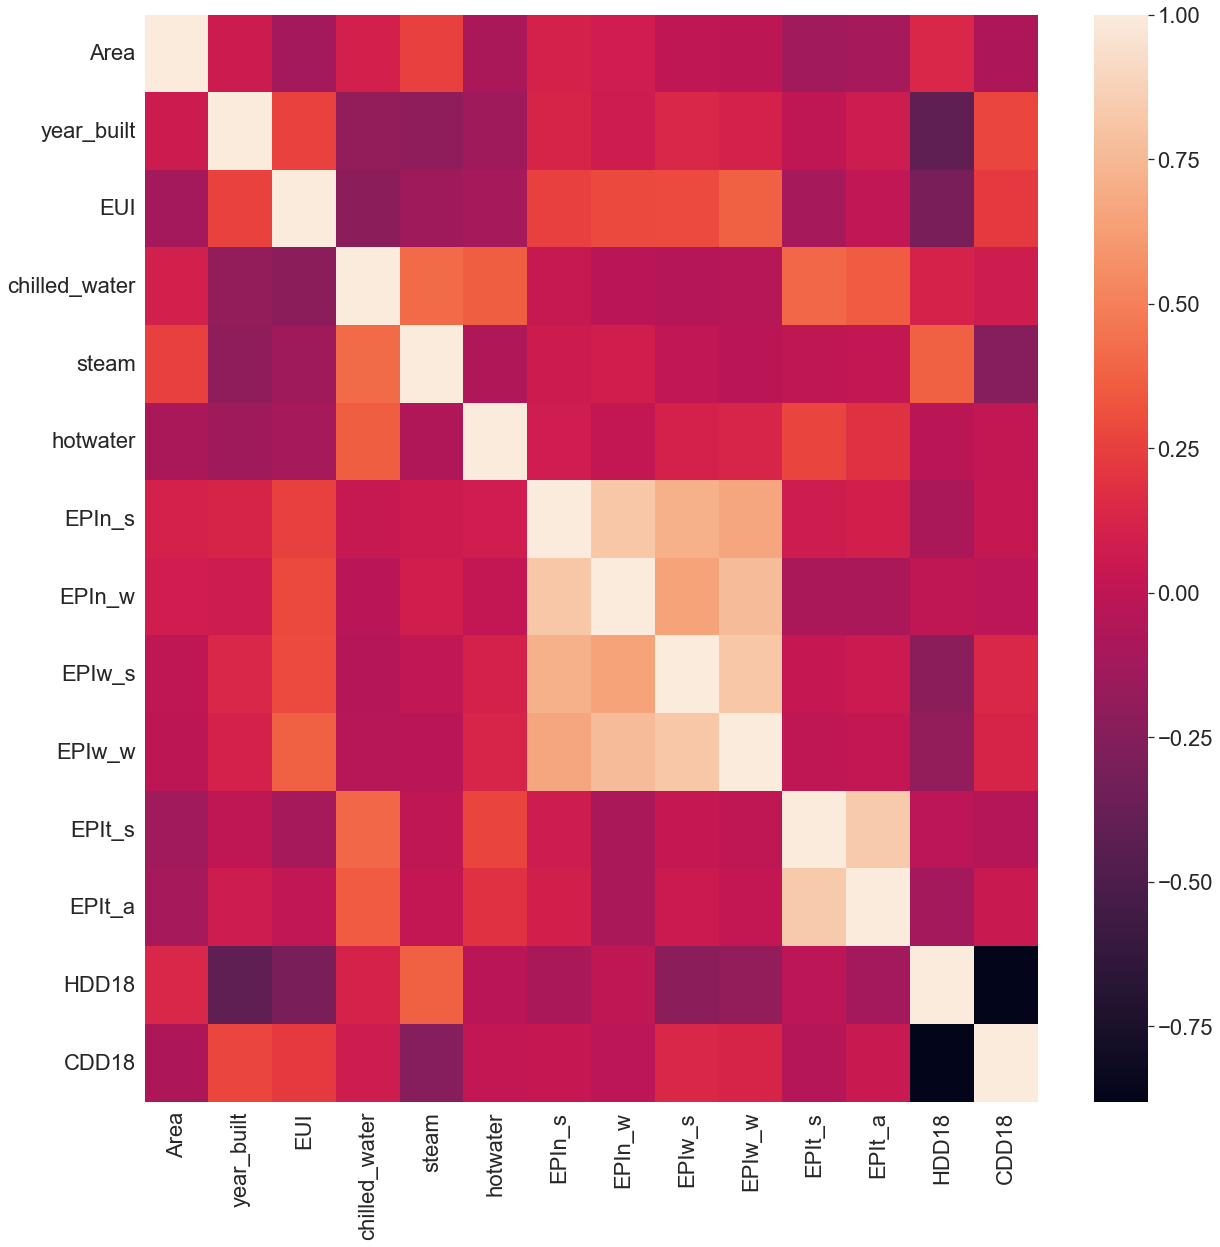

In [33]:
plt.figure(figsize=(20, 20))
Var_Corr = building_meta_df_office[['Area','year_built','EUI', 'chilled_water', 'steam',
       'hotwater','EPIn_s','EPIn_w','EPIw_s', 'EPIw_w','EPIt_s','EPIt_a','HDD18', 'CDD18']].corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)
plt.savefig('Heatmap0520.jpg',dpi=300)

In [36]:
Var_Corr

,Area,year_built,EUI,chilled_water,steam,hotwater,EPIn_s,EPIn_w,EPIw_s,EPIw_w,EPIt_s,EPIt_a,HDD18,CDD18
Area,1.000000,0.062046,-0.115626,0.104139,0.246854,-0.084947,0.106911,-0.011537,0.004138,-0.000119,-0.127675,-0.109492,0.137795,-0.071693
year_built,0.062046,1.000000,0.261425,-0.184456,-0.199221,-0.130326,0.126482,-0.025956,0.141844,0.108449,0.006873,0.067982,-0.414943,0.281331
EUI,-0.115626,0.261425,1.000000,-0.212993,-0.142289,-0.105906,0.251860,0.043404,0.288237,0.370213,-0.107902,0.008691,-0.304975,0.229094
chilled_water,0.104139,-0.184456,-0.212993,1.000000,0.414881,0.366976,0.043144,-0.069916,-0.033374,-0.030073,0.402747,0.355414,0.114758,0.078450
steam,0.246854,-0.199221,-0.142289,0.414881,1.000000,-0.070217,0.062252,-0.022611,0.011362,-0.011037,0.004857,0.018926,0.369260,-0.239310
hotwater,-0.084947,-0.130326,-0.105906,0.366976,-0.070217,1.000000,0.079809,-0.019962,0.108771,0.134584,0.266711,0.185839,-0.019470,0.024184
EPIn_s,0.106911,0.126482,0.251860,0.043144,0.062252,0.079809,1.000000,0.139617,0.715740,0.667326,0.072619,0.094503,-0.092428,0.033803
EPIn_w,-0.011537,-0.025956,0.043404,-0.069916,-0.022611,-0.019962,0.139617,1.000000,0.100476,0.086372,-0.075139,0.011739,0.008173,-0.070380
EPIw_s,0.004138,0.141844,0.288237,-0.033374,0.011362,0.108771,0.715740,0.100476,1.000000,0.817403,0.039811,0.055646,-0.224970,0.145589
EPIw_w,-0.000119,0.108449,0.370213,-0.030073,-0.011037,0.134584,0.667326,0.086372,0.817403,1.000000,0.012565,0.015463,-0.186340,0.124605


In [26]:
building_meta_df_office['EPIn_s'].describe()

count    238.00000
mean       0.64416
std        0.16142
min        0.13000
25%        0.52250
50%        0.66000
75%        0.76000
max        0.95000
Name: EPIn_s, dtype: float64

In [27]:
building_meta_df_office['EPIn_w'].describe()

count    238.000000
mean       0.661008
std        0.145378
min        0.200000
25%        0.580000
50%        0.670000
75%        0.770000
max        0.970000
Name: EPIn_w, dtype: float64

In [28]:
building_meta_df_office['EPIw_s'].describe()

count    238.000000
mean       0.726218
std        0.169454
min        0.120000
25%        0.630000
50%        0.770000
75%        0.830000
max        1.290000
Name: EPIw_s, dtype: float64

In [29]:
building_meta_df_office['EPIw_w'].describe()

count    238.000000
mean       0.736765
std        0.166746
min        0.180000
25%        0.640000
50%        0.760000
75%        0.860000
max        1.050000
Name: EPIw_w, dtype: float64

In [30]:
building_meta_df_office['EPIt_s'].describe()

count    238.000000
mean       0.956912
std        0.240607
min        0.180000
25%        0.820000
50%        0.990000
75%        1.090000
max        1.860000
Name: EPIt_s, dtype: float64

In [32]:
building_meta_df_office['EPIt_a'].describe()

count    238.000000
mean       0.955462
std        0.213088
min        0.370000
25%        0.822500
50%        0.990000
75%        1.097500
max        1.750000
Name: EPIt_a, dtype: float64